C:\Users\ayush\AppData\Local\Temp\ipykernel_17692\3528763783.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


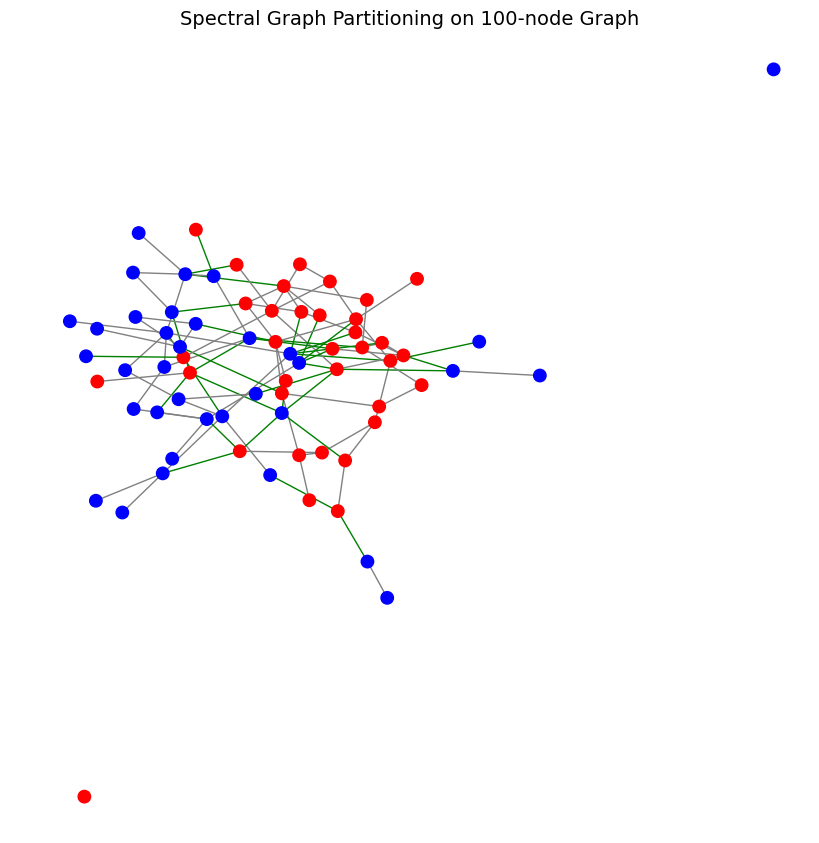

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigsh

# Step 1: Generate a graph with 100 nodes
G = nx.erdos_renyi_graph(70, 0.05, seed=42)

# Step 2: Compute Laplacian and Fiedler vector
L = nx.laplacian_matrix(G).astype(float)
_, vecs = eigsh(L, k=2, which='SM')  # Compute smallest two eigenvalues/vectors
fiedler_vector = vecs[:, 1]

# Step 3: Partition graph based on sign of Fiedler vector (balanced partitioning)
sorted_indices = np.argsort(fiedler_vector)
half = len(sorted_indices) // 2
partition_1 = set(sorted_indices[:half])
partition_2 = set(sorted_indices[half:])

# Step 4: Draw the graph
pos = nx.spring_layout(G, seed=42)  # consistent layout

node_colors = ['blue' if node in partition_1 else 'red' for node in G.nodes()]
edge_colors = ['green' if (u in partition_1 and v in partition_2) or (u in partition_2 and v in partition_1) else 'gray' for u, v in G.edges()]

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, with_labels=False, node_size=80)
plt.title("Spectral Graph Partitioning on 100-node Graph", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


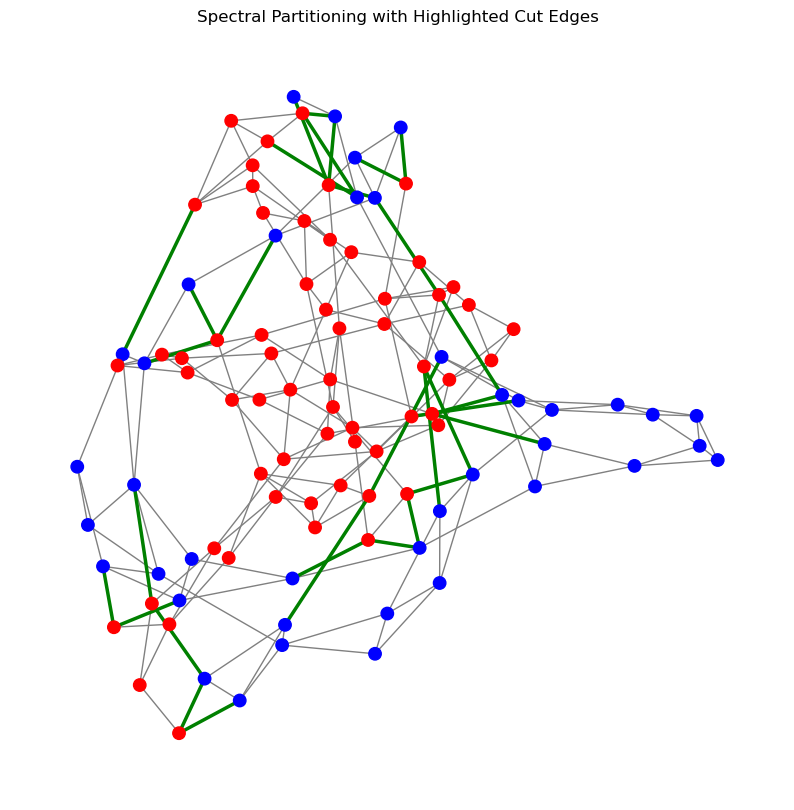

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Generate a connected random graph with 100 nodes
G = nx.connected_watts_strogatz_graph(n=100, k=4, p=0.1)

# Step 2: Compute Laplacian and Fiedler vector
L = nx.laplacian_matrix(G).toarray()
eigvals, eigvecs = np.linalg.eigh(L)
fiedler_vector = eigvecs[:, 1]

# Step 3: Partition based on sign of Fiedler vector
partition_1 = [i for i, val in enumerate(fiedler_vector) if val < 0]
partition_2 = [i for i, val in enumerate(fiedler_vector) if val >= 0]

# Ensure both partitions form connected subgraphs
def ensure_connected_partition(G, fiedler_vector):
    sorted_nodes = np.argsort(fiedler_vector)
    for i in range(40, 60):  # try splits around middle
        p1 = sorted_nodes[:i]
        p2 = sorted_nodes[i:]
        if nx.is_connected(G.subgraph(p1)) and nx.is_connected(G.subgraph(p2)):
            return p1.tolist(), p2.tolist()
    return partition_1, partition_2  # fallback

partition_1, partition_2 = ensure_connected_partition(G, fiedler_vector)

# Node colors
node_colors = ['blue' if n in partition_1 else 'red' for n in G.nodes()]

# Separate edge groups for custom drawing
edges_between = [(u, v) for u, v in G.edges() if (u in partition_1 and v in partition_2) or (u in partition_2 and v in partition_1)]
edges_within = [e for e in G.edges() if e not in edges_between]

# Plot
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)

# Draw edges within subgraphs
nx.draw_networkx_edges(G, pos, edgelist=edges_within, edge_color='gray', width=1)
# Draw inter-partition edges in green with thicker lines
nx.draw_networkx_edges(G, pos, edgelist=edges_between, edge_color='green', width=2.5)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=80)

plt.title("Spectral Partitioning with Highlighted Cut Edges")
plt.axis('off')
plt.show()


In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def spectral_partitioning(G):
    # Step 1: Plot original graph
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title("Original Graph")
    plt.show()

    # Step 2: Compute the Laplacian matrix
    L = nx.laplacian_matrix(G).toarray()
    print(L)
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(L)
    fiedler_vector = eigenvectors[:, 1]  # second smallest eigenvector

    # Step 4: Partition based on sign of Fiedler vector entries
    G1_nodes = [i for i, val in enumerate(fiedler_vector) if val >= 0]
    G2_nodes = [i for i, val in enumerate(fiedler_vector) if val < 0]

    # Step 5: Draw the partitioned subgraphs
    color_map = []
    for node in G.nodes():
        if node in G1_nodes:
            color_map.append('blue')
        else:
            color_map.append('red')

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color='gray')
    plt.title("Spectral Partitioned Graph")
    plt.show()

    # Step 6: Subgraph statistics
    G1 = G.subgraph(G1_nodes)
    G2 = G.subgraph(G2_nodes)

    total_vertices = G.number_of_nodes()
    total_edges = G.number_of_edges()
    G1_vertices = G1.number_of_nodes()
    G1_edges = G1.number_of_edges()
    G2_vertices = G2.number_of_nodes()
    G2_edges = G2.number_of_edges()

    internal_edges = G1_edges + G2_edges
    lost_edges = total_edges - internal_edges

    print("===== Graph Statistics =====")
    print(f"Total Graph:    {total_vertices} vertices, {total_edges} edges")
    print(f"Subgraph G1:    {G1_vertices} vertices, {G1_edges} edges")
    print(f"Subgraph G2:    {G2_vertices} vertices, {G2_edges} edges")
    print(f"Lost edges (between G1 and G2): {lost_edges}")

    # return {
    #     "G1_nodes": G1_nodes,
    #     "G2_nodes": G2_nodes,
    #     "lost_edges": lost_edges,
    #     "fiedler_vector": fiedler_vector
    # }


In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def spectral_partitioning(G):
    # Step 1: Layout for consistency
    pos = nx.spring_layout(G, seed=42)

    # Step 2: Compute the Laplacian matrix
    L = nx.laplacian_matrix(G).toarray()

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(L)
    fiedler_vector = eigenvectors[:, 1]  # second smallest eigenvector
    print(fiedler_vector)
    # Step 4: Partition based on sign of Fiedler vector entries
    G1_nodes = [i for i, val in enumerate(fiedler_vector) if val < 0]
    G2_nodes = [i for i, val in enumerate(fiedler_vector) if val >= 0]
    print(G1_nodes,G2_nodes)
    
    # Step 5: Create color map for partitioning
    color_map = ['blue' if node in G1_nodes else 'red' for node in G.nodes()]

    # Plotting both graphs side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original Graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', ax=axes[0])
    axes[0].set_title("Original Graph")

    # Partitioned Graph
    nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color='gray', ax=axes[1])
    axes[1].set_title("Spectral Partitioned Graph")

    plt.tight_layout()
    plt.show()

    # Step 6: Subgraph statistics
    G1 = G.subgraph(G1_nodes)
    G2 = G.subgraph(G2_nodes)

    total_vertices = G.number_of_nodes()
    total_edges = G.number_of_edges()
    G1_vertices = G1.number_of_nodes()
    G1_edges = G1.number_of_edges()
    G2_vertices = G2.number_of_nodes()
    G2_edges = G2.number_of_edges()

    internal_edges = G1_edges + G2_edges
    lost_edges = total_edges - internal_edges

    # print("===== Graph Statistics =====")
    # print(f"Total Graph:    {total_vertices} vertices, {total_edges} edges")
    # print(f"Subgraph G1:    {G1_vertices} vertices, {G1_edges} edges")
    # print(f"Subgraph G2:    {G2_vertices} vertices, {G2_edges} edges")
    print(f"Lost edges (between G1 and G2): {lost_edges}")

 
 


[-0.1233171  -0.0580066  -0.01368446 -0.07445083 -0.26733837 -0.29881441
 -0.29744558 -0.06406144  0.0530052   0.12925543 -0.28550172 -0.20406685
 -0.12324309 -0.03493189  0.17156602  0.15520216 -0.37166422 -0.16804128
  0.21148231 -0.0625882   0.18847412 -0.1289233   0.16858175  0.14801794
  0.15762212  0.14632034  0.19249255  0.12982346  0.09449019  0.16960883
  0.08368282  0.1170647   0.13538405  0.12400534]
[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21] [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


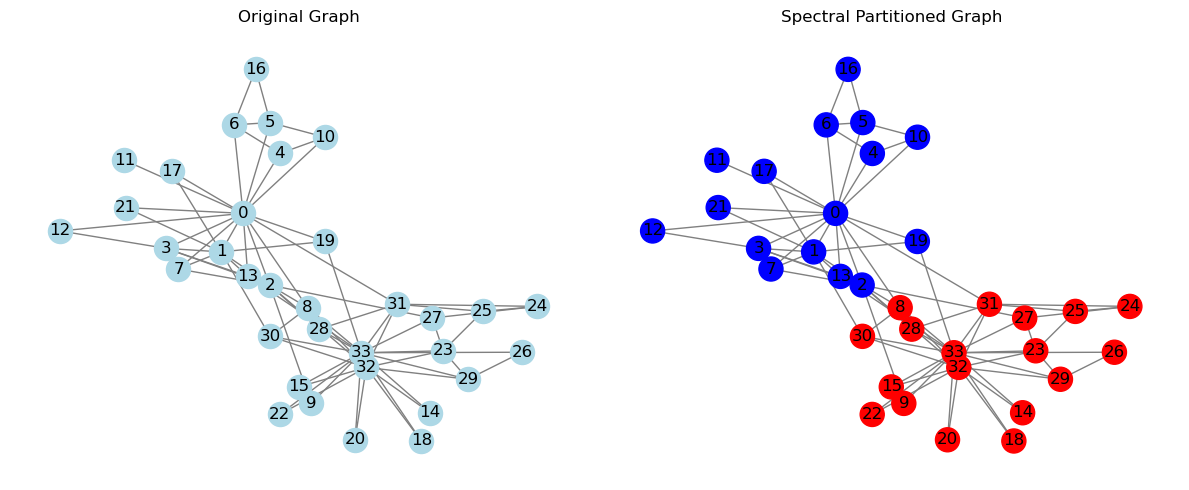

Lost edges (between G1 and G2): 10


In [23]:
G = nx.karate_club_graph()
spectral_partitioning(G)

[-0.44861833 -0.44861833 -0.35066406 -0.07818925  0.21135792  0.31544966
  0.35066406  0.44861833]
[0, 1, 2, 3] [4, 5, 6, 7]


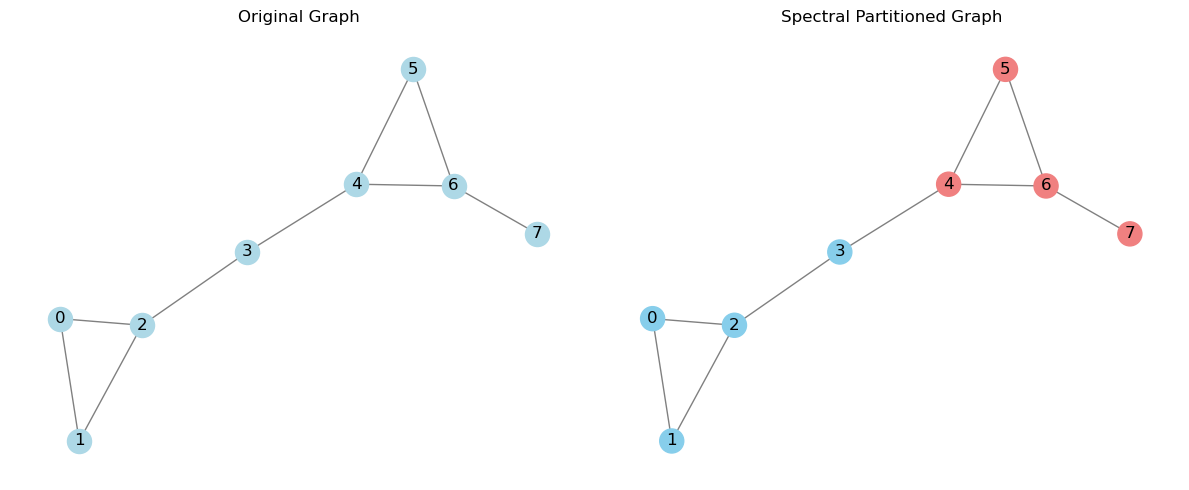

Lost edges (between G1 and G2): 1


In [5]:
G = nx.Graph()
G.add_edges_from([
    (0, 1), (0, 2), (1, 2), (2, 3),  # Cluster 1
    (4, 5), (4, 6), (5, 6), (6, 7),  # Cluster 2
    (3, 4)  # Connection between clusters
])
spectral_partitioning(G)


[ 5.77345614e-01  2.87513511e-01 -2.31859108e-03  2.89832102e-01
  3.80580168e-16 -2.89832102e-01  2.31859108e-03 -2.87513511e-01
 -5.77345614e-01]
[2, 5, 7, 8] [0, 1, 3, 4, 6]


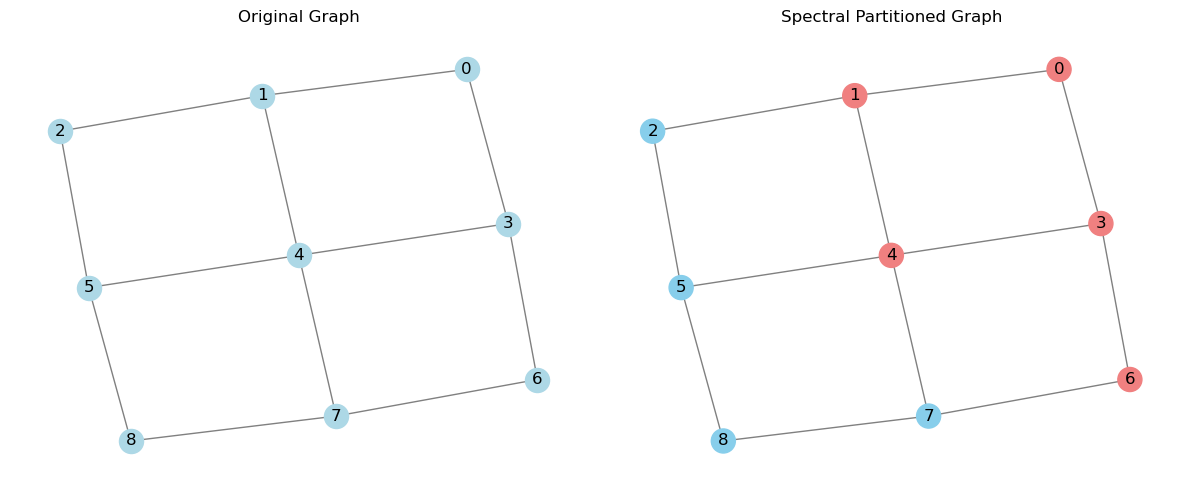

Lost edges (between G1 and G2): 4


In [6]:
G = nx.grid_2d_graph(3, 3)
# Convert node labels to integers for consistency
G = nx.convert_node_labels_to_integers(G)
spectral_partitioning(G)

[ 0.          0.89442719 -0.2236068  -0.2236068  -0.2236068  -0.2236068 ]
[2, 3, 4, 5] [0, 1]


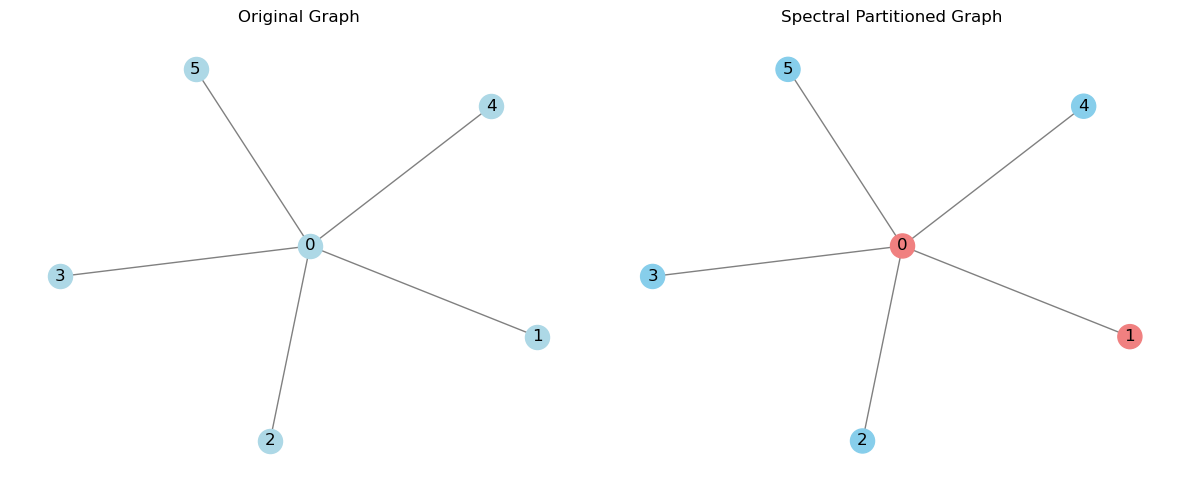

Lost edges (between G1 and G2): 4


In [7]:
G = nx.star_graph(5) 
spectral_partitioning(G)

[-0.20436737  0.18093416  0.11143737  0.08567833 -0.88309243  0.23742587
  0.18495873  0.11533734  0.02557944  0.14610856]
[0, 4] [1, 2, 3, 5, 6, 7, 8, 9]


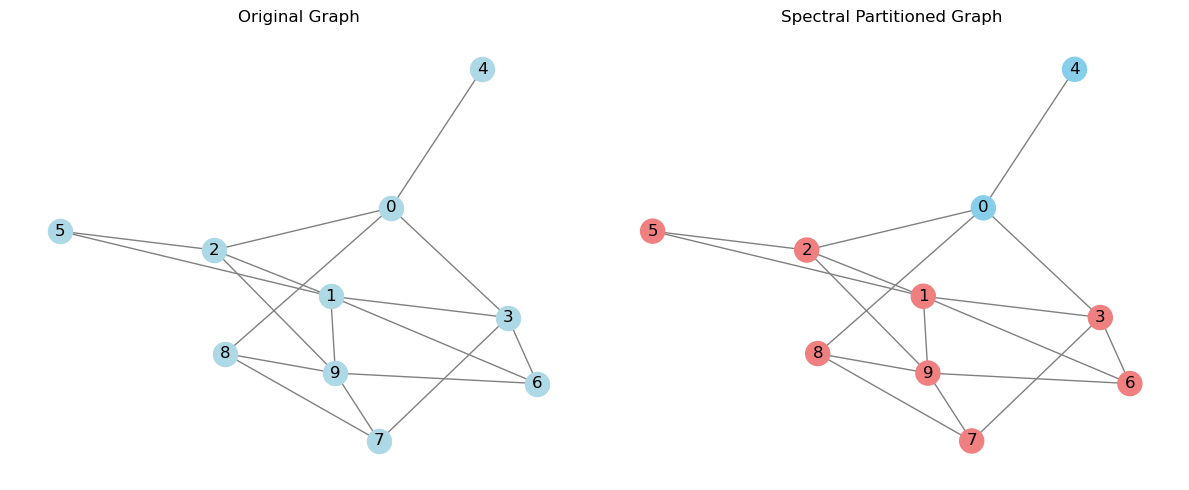

Lost edges (between G1 and G2): 3


In [8]:
G = nx.erdos_renyi_graph(n=10, p=0.3, seed=42)
spectral_partitioning(G)

[ 0.05213393 -0.11470829 -0.25430876 -0.33351412 -0.33351412 -0.25430876
 -0.11470829  0.37343723  0.48974559  0.48974559]
[1, 2, 3, 4, 5, 6] [0, 7, 8, 9]


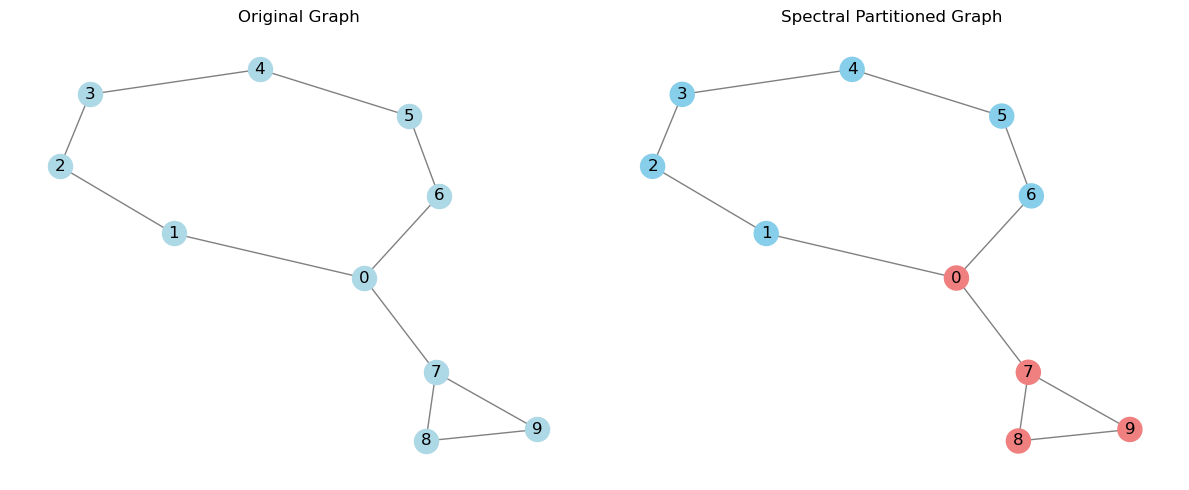

Lost edges (between G1 and G2): 2


In [9]:
import networkx as nx

G = nx.Graph()

# Left cycle: 0-1-2-3-4-5-6-0
cycle_edges = [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,0)]

# Path to triangle: 0-7, 7-8, 7-9, 8-9
bridge_and_triangle = [(0,7), (7,8), (7,9), (8,9)]

# Combine edges
edges = cycle_edges + bridge_and_triangle
G.add_edges_from(edges)

# Call your function (assuming it's already defined)
spectral_partitioning(G)


[ 0.48858238  0.25033199  0.19533734  0.40058017 -0.25033199 -0.48858238
 -0.40058017 -0.19533734]
[4, 5, 6, 7] [0, 1, 2, 3]


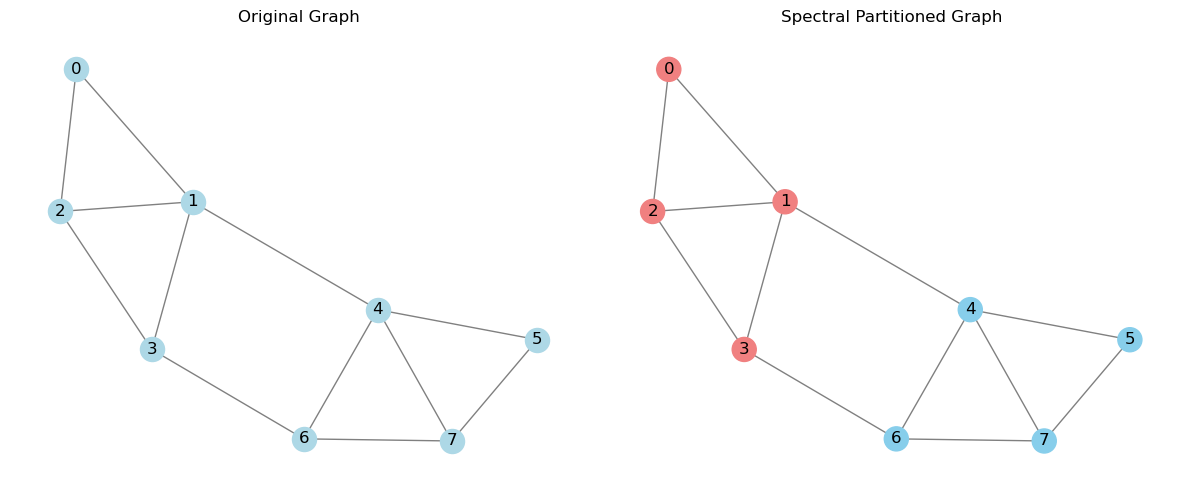

Lost edges (between G1 and G2): 2


In [10]:
import networkx as nx

G = nx.Graph()

# Left square and diagonal (0-based indexing)
left_square = [(0,1), (1,3), (3,2), (2,0), (1,2)]

# Right square and diagonal
right_square = [(4,5), (5,7), (7,6), (6,4), (7,4)]

# Connection between the two squares
bridge = [(1,4), (3,6)]

# Add all edges to graph
G.add_edges_from(left_square + right_square + bridge)

# Call the spectral partitioning function
spectral_partitioning(G)


[ 0.05213393 -0.11470829 -0.25430876 -0.33351412 -0.33351412 -0.25430876
 -0.11470829  0.37343723  0.48974559  0.48974559]
[1, 2, 3, 4, 5, 6] [0, 7, 8, 9]


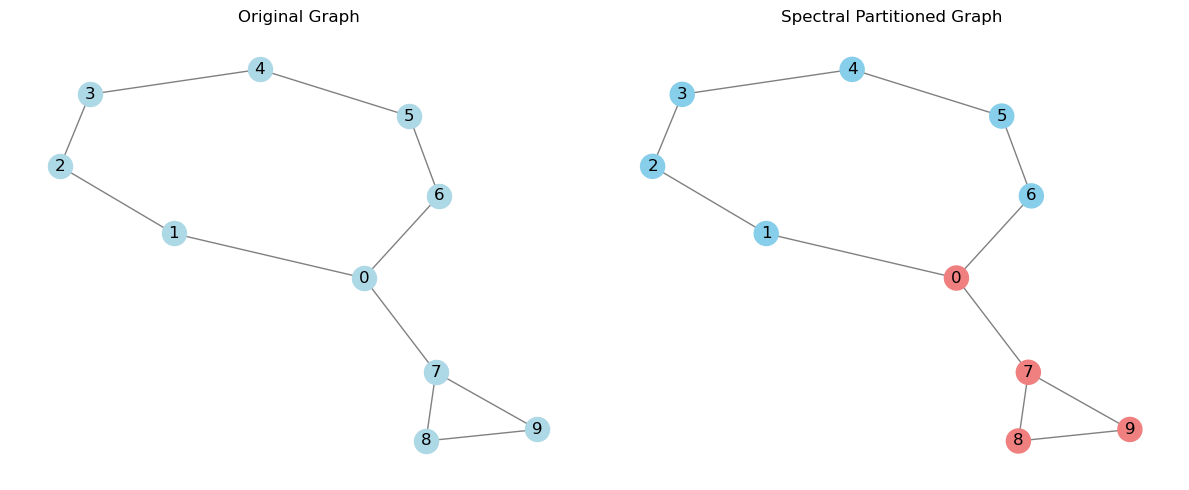

Lost edges (between G1 and G2): 2


In [11]:
import networkx as nx

G = nx.Graph()

# Left cycle: 0-1-2-3-4-5-6-0
cycle_edges = [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,0)]

# Path to triangle: 0-7, 7-8, 7-9, 8-9
bridge_and_triangle = [(0,7), (7,8), (7,9), (8,9)]

# Combine edges
edges = cycle_edges + bridge_and_triangle
G.add_edges_from(edges)

# Call your function (assuming it's already defined)
spectral_partitioning(G)


[ 0.55767754  0.40824829  0.14942925 -0.14942925 -0.40824829 -0.55767754]
[3, 4, 5] [0, 1, 2]


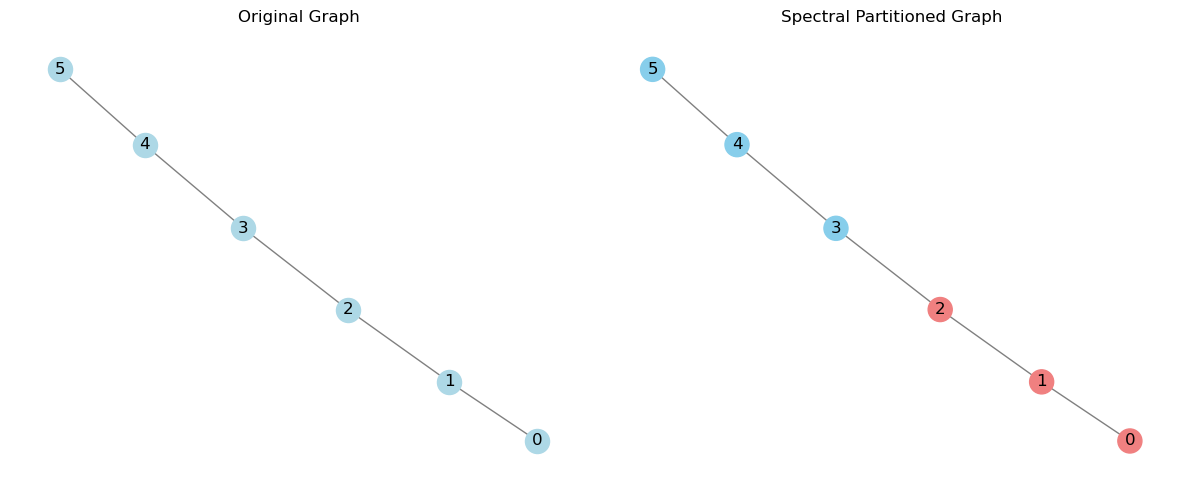

Lost edges (between G1 and G2): 1


In [12]:
G = nx.path_graph(6)  # nodes: 0-1-2-3-4-5 (length = number of edges = 5)
spectral_partitioning(G)

[-7.07106781e-01  9.42055475e-16  7.07106781e-01]
[0] [1, 2]


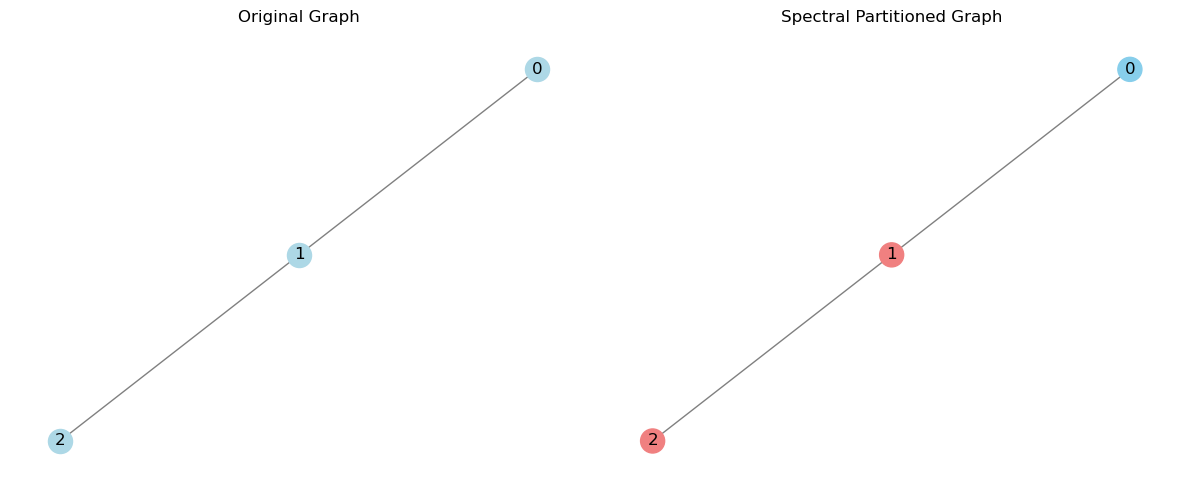

Lost edges (between G1 and G2): 1


In [13]:
G = nx.path_graph(3)  # nodes: 0-1-2-3-4-5 (length = number of edges = 5)
spectral_partitioning(G)

[-0.65328148 -0.27059805  0.27059805  0.65328148]
[0, 1] [2, 3]


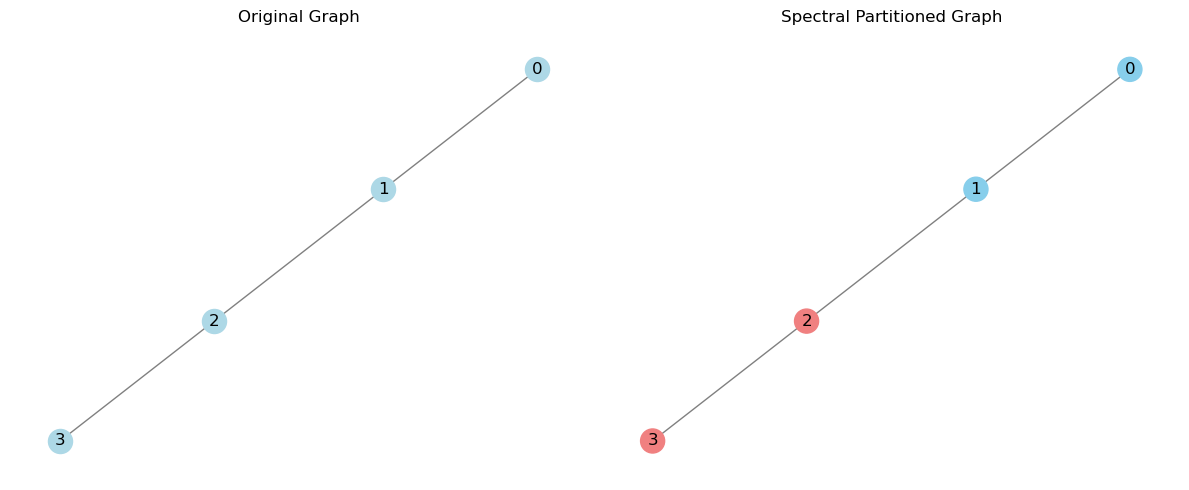

Lost edges (between G1 and G2): 1


In [14]:
G = nx.path_graph(4)  # nodes: 0-1-2-3-4-5 (length = number of edges = 5)
spectral_partitioning(G)

[ 0.46470513  0.46470513  0.26095647 -0.26095647 -0.46470513 -0.46470513]
[3, 4, 5] [0, 1, 2]


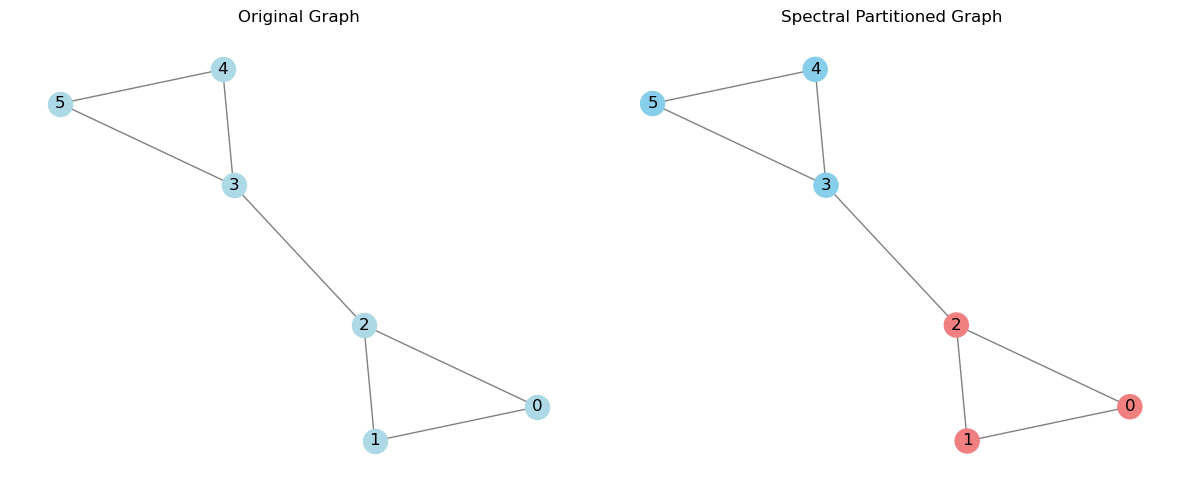

Lost edges (between G1 and G2): 1


In [15]:
import networkx as nx

G = nx.Graph()

# Left cycle: 0-1-2-3-4-5-6-0
c1_edges = [(0,1), (1,2), (2,0)]

# Path to triangle: 0-7, 7-8, 7-9, 8-9
c2_edges = [(3,4), (4,5), (5,3)]

con_edges= [(2,3)]
# Combine edges


# Add all edges to graph
G.add_edges_from(c1_edges + con_edges + c2_edges)

# Call the spectral partitioning function
spectral_partitioning(G)

